In [18]:
#Import sys for path adjustment
import sys
sys.path.append('../')

#keras packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, SpatialDropout2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau

#Dataframes and arrays
import numpy as np
import pandas as pd

#dataviz
import matplotlib.pyplot as plt
%matplotlib inline

#split
from sklearn.model_selection import train_test_split

#progress bar
from tqdm import tqdm

In [2]:
#import final dataframe
df = pd.read_csv('../data/final_dataset.csv')
print(df.head())
print(df.columns)
#import encoded labels
y = pd.read_csv('../data/encoded_labels.csv')
print(y.head())
print(y.columns)

                                          track_name               artist  \
0                                         Guillotine  Stray From The Path   
1                                             Vermin            Allegaeon   
2                         Put Your Back Into The Oar          Amon Amarth   
3                                       Make Believe     Memphis May Fire   
4  Dystopia (feat. Christoph Wieczorek of Annisokay)              Caliban   

                                         spectrogram  \
0  ../data/images/spectrograms/Guillotine_StrayFr...   
1  ../data/images/spectrograms/Vermin_Allegaeon_s...   
2  ../data/images/spectrograms/PutYourBackIntoThe...   
3  ../data/images/spectrograms/MakeBelieve_Memphi...   
4  ../data/images/spectrograms/DystopiafeatChrist...   

                                              genres  
0  ['deathcore', 'punk', 'melodic', 'hardcore', '...  
1     ['melodeath', 'melodic', 'death', 'technical']  
2          ['death', 'melodic', 'me

In [3]:
imagepath = df['spectrogram']
seed = 77

In [4]:
X_dataset = []
for i in tqdm(range(df.shape[0])):
    img = image.image_utils.load_img(imagepath[i], target_size=(1008,360,3))
    img = image.image_utils.img_to_array(img)
    img = img/255
    X_dataset.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 688/688 [00:05<00:00, 116.87it/s]


In [5]:
X = np.array(X_dataset)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=0.3)

In [7]:
X.shape

(688, 1008, 360, 3)

## Model

In [8]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(1008,360,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,2))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,2))

model.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(27, activation='sigmoid'))

In [9]:
# Check the model to verify it's structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1004, 356, 16)     1216      
                                                                 
 batch_normalization (BatchN  (None, 1004, 356, 16)    64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 502, 178, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 502, 178, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 498, 174, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 249, 87, 32)      0

In [10]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.000001)

In [11]:
#compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=24, batch_size=32, validation_data=(X_test,y_test), callbacks=[reduce_lr])

Epoch 1/24
16/16 [==============================] - 86s 5s/step - loss: 2.5922 - accuracy: 0.0270 - val_loss: 0.6865 - val_accuracy: 0.0821 - lr: 0.0010
Epoch 2/24
16/16 [==============================] - 85s 5s/step - loss: 0.6833 - accuracy: 0.0582 - val_loss: 0.6787 - val_accuracy: 0.0821 - lr: 0.0010
Epoch 3/24
16/16 [==============================] - 85s 5s/step - loss: 0.6756 - accuracy: 0.0644 - val_loss: 0.6640 - val_accuracy: 0.0725 - lr: 0.0010
Epoch 4/24
16/16 [==============================] - 86s 5s/step - loss: 0.6679 - accuracy: 0.0561 - val_loss: 0.6221 - val_accuracy: 0.1787 - lr: 0.0010
Epoch 5/24
16/16 [==============================] - 89s 6s/step - loss: 0.6605 - accuracy: 0.0644 - val_loss: 0.6381 - val_accuracy: 0.2271 - lr: 0.0010
Epoch 6/24
16/16 [==============================] - 90s 6s/step - loss: 0.6534 - accuracy: 0.0665 - val_loss: 0.6567 - val_accuracy: 0.2319 - lr: 0.0010
Epoch 7/24
16/16 [==============================] - 90s 6s/step - loss: 0.6462 - a

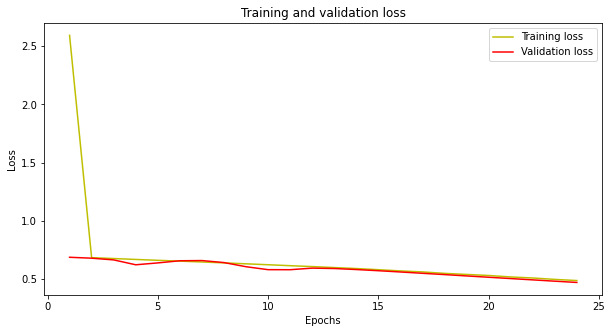

In [13]:
# Loss Charts
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)


fig = plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../data/images/charts/run10_training_val_loss.jpg')
plt.show()

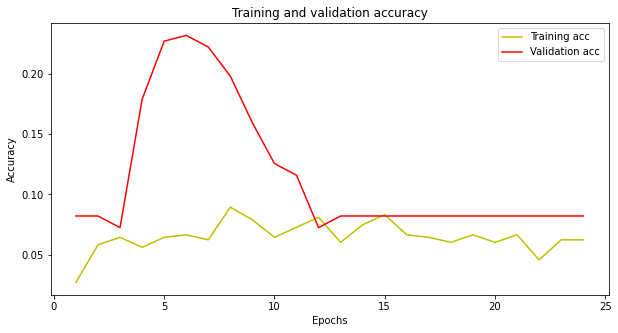

In [14]:
# Accuracy charts
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) +1)


fig = plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'y', label='Training acc')
plt.plot(epochs, val_loss, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('../data/images/charts/run10_training_val_acc.jpg')
plt.show()

In [15]:
model.save('../data/models/sequential_run11_trained.sav')

INFO:tensorflow:Assets written to: ../data/models/sequential_run11_trained.sav\assets


INFO:tensorflow:Assets written to: ../data/models/sequential_run11_trained.sav\assets


### Predict on test song

In [63]:
test_path = '../data/test_sample/Annihilator_Kraign_spectro.png'
test_batch = np.zeros((1, 1008, 360, 3))
test_img = image.image_utils.load_img(test_path, target_size=(1008,360))
test_batch[0, :] = test_img

In [73]:
test_batch

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [79]:
yhat = model.predict(test_batch)

1/1 [==============================] - 0s 56ms/step


In [80]:
#round proba to class labels
# yhat = yhat.round()

In [81]:
yhat

array([[0.38697365, 0.28262848, 0.3640558 , 0.32998917, 0.2796138 ,
        0.32889223, 0.29140297, 0.3195205 , 0.28626963, 0.25361973,
        0.26663285, 0.33460963, 0.31553108, 0.42264915, 0.4923118 ,
        0.40214506, 0.337783  , 0.27308413, 0.33065724, 0.33817062,
        0.29351127, 0.31908014, 0.3152651 , 0.35053134, 0.29863217,
        0.27009377, 0.27663574]], dtype=float32)

In [82]:
predict_data = pd.DataFrame(data=yhat, columns=y.columns)

In [84]:
predict_pivot = predict_data.pivot_table(columns='Score')

In [87]:
predict_pivot.sort_values('Score', ascending=False)

,Score
metal,0.492312
melodic,0.422649
metalcore,0.402145
alternative,0.386974
classic,0.364056
rock,0.350531
posthardcore,0.338171
modern,0.337783
hardcore,0.334610
postgrunge,0.330657
